### Capstone Project: Predicting MLB Player Salary - Position Players

Imports

In [498]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

pd.options.display.max_columns = 100
pd.options.display.max_rows = 3000

Load Data

In [349]:
batting = pd.read_csv('Batting.csv')
pitching = pd.read_csv('Pitching.csv')
salaries = pd.read_csv('Salaries.csv')
all_star = pd.read_csv('AllStarFull.csv')
awards = pd.read_csv('AwardsPlayers.csv') 

### Batting Data

In [385]:
batting.shape

(107429, 22)

In [282]:
batting.head()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,abercda01,1871,1,TRO,NaN,1,4,0,0,0,0,0,0.0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,0.0
1,addybo01,1871,1,RC1,NaN,25,118,30,32,6,0,0,13.0,8.0,1.0,4,0.0,NaN,NaN,NaN,NaN,0.0
2,allisar01,1871,1,CL1,NaN,29,137,28,40,4,5,0,19.0,3.0,1.0,2,5.0,NaN,NaN,NaN,NaN,1.0
3,allisdo01,1871,1,WS3,NaN,27,133,28,44,10,2,2,27.0,1.0,1.0,0,2.0,NaN,NaN,NaN,NaN,0.0
4,ansonca01,1871,1,RC1,NaN,25,120,29,39,11,3,0,16.0,6.0,2.0,2,1.0,NaN,NaN,NaN,NaN,0.0


In [283]:
batting.tail()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
107424,zimmejo02,2019,1,DET,AL,23,2,0,0,0,0,0,0.0,0.0,0.0,0,2.0,0.0,0.0,0.0,0.0,0.0
107425,zimmeky01,2019,1,KCA,AL,15,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
107426,zimmery01,2019,1,WAS,NL,52,171,20,44,9,0,6,27.0,0.0,0.0,17,39.0,0.0,0.0,0.0,2.0,4.0
107427,zobribe01,2019,1,CHN,NL,47,150,24,39,5,0,1,17.0,0.0,0.0,23,24.0,0.0,1.0,0.0,2.0,6.0
107428,zuninmi01,2019,1,TBA,AL,90,266,30,44,10,1,9,32.0,0.0,0.0,20,98.0,0.0,3.0,0.0,0.0,4.0


In [284]:
batting.isnull().sum()

playerID        0
yearID          0
stint           0
teamID          0
lgID          738
G               0
AB              0
R               0
H               0
2B              0
3B              0
HR              0
RBI           756
SB           2368
CS          23541
BB              0
SO           2100
IBB         36651
HBP          2817
SH           6069
SF          36104
GIDP        25441
dtype: int64

In [285]:
batting.describe()

,yearID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
count,107429.000000,107429.000000,107429.000000,107429.000000,107429.000000,107429.000000,107429.000000,107429.000000,107429.000000,106673.000000,105061.000000,83888.000000,107429.000000,105329.000000,70778.000000,104612.000000,101360.000000,71325.000000,81988.000000
mean,1966.552141,1.079206,51.134098,140.454551,18.639818,36.714863,6.254261,1.260619,2.864785,16.929664,2.948135,1.192960,12.948785,20.677297,1.072664,1.063874,2.225345,1.036775,2.926404
std,39.549982,0.287394,47.015896,184.286687,28.161252,52.399701,9.667879,2.608268,6.396150,26.336778,7.649862,2.699623,20.683452,28.606481,2.731013,2.299923,4.175046,1.943212,4.698823
min,1871.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1936.000000,1.000000,12.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1976.000000,1.000000,34.000000,47.000000,4.000000,8.000000,1.000000,0.000000,0.000000,3.000000,0.000000,0.000000,2.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2000.000000,1.000000,80.000000,228.000000,27.000000,57.000000,9.000000,1.000000,2.000000,24.000000,2.000000,1.000000,18.000000,29.000000,1.000000,1.000000,3.000000,1.000000,4.000000
max,2019.000000,5.000000,165.000000,716.000000,198.000000,262.000000,67.000000,36.000000,73.000000,191.000000,138.000000,42.000000,232.000000,223.000000,120.000000,51.000000,67.000000,19.000000,36.000000


In [286]:
# Batting Stats of Pitcher Max Scherzer which we do not want in our data
batting[batting['playerID'] == 'scherma01']

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
91240,scherma01,2008,1,ARI,NL,17,13,1,0,0,0,0,0.0,0.0,0.0,1,4.0,0.0,0.0,1.0,0.0,0.0
92624,scherma01,2009,1,ARI,NL,31,53,4,12,2,0,0,3.0,0.0,0.0,3,17.0,0.0,0.0,5.0,0.0,1.0
93980,scherma01,2010,1,DET,AL,31,2,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
95366,scherma01,2011,1,DET,AL,33,4,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
96782,scherma01,2012,1,DET,AL,32,2,0,0,0,0,0,0.0,0.0,0.0,0,1.0,0.0,0.0,2.0,0.0,0.0
98202,scherma01,2013,1,DET,AL,32,3,0,1,1,0,0,1.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
99616,scherma01,2014,1,DET,AL,33,2,0,0,0,0,0,0.0,0.0,0.0,0,1.0,0.0,0.0,2.0,0.0,0.0
101099,scherma01,2015,1,WAS,NL,34,69,4,15,0,0,0,0.0,0.0,0.0,2,23.0,0.0,0.0,6.0,0.0,0.0
102578,scherma01,2016,1,WAS,NL,34,70,4,13,1,0,0,12.0,0.0,0.0,2,30.0,0.0,0.0,13.0,0.0,1.0
104051,scherma01,2017,1,WAS,NL,31,62,4,10,0,0,1,5.0,0.0,0.0,4,16.0,0.0,0.0,6.0,0.0,0.0


### Salary Data

In [287]:
salaries.head()

,yearID,teamID,lgID,playerID,salary
0,1985,ATL,NL,barkele01,870000
1,1985,ATL,NL,bedrost01,550000
2,1985,ATL,NL,benedbr01,545000
3,1985,ATL,NL,campri01,633333
4,1985,ATL,NL,ceronri01,625000


In [288]:
salaries.tail()

,yearID,teamID,lgID,playerID,salary
26423,2016,WAS,NL,strasst01,10400000
26424,2016,WAS,NL,taylomi02,524000
26425,2016,WAS,NL,treinbl01,524900
26426,2016,WAS,NL,werthja01,21733615
26427,2016,WAS,NL,zimmery01,14000000


In [289]:
salaries.isnull().sum()

yearID      0
teamID      0
lgID        0
playerID    0
salary      0
dtype: int64

In [290]:
salaries.describe()

,yearID,salary
count,26428.000000,2.642800e+04
mean,2000.878727,2.085634e+06
std,8.909314,3.455348e+06
min,1985.000000,0.000000e+00
25%,1994.000000,2.947020e+05
50%,2001.000000,5.500000e+05
75%,2009.000000,2.350000e+06
max,2016.000000,3.300000e+07


### Pitching Data

In [291]:
pitching.head()

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,SHO,SV,IPouts,H,ER,HR,BB,SO,BAOpp,ERA,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
0,bechtge01,1871,1,PH1,NaN,1,2,3,3,2,0,0,78,43,23,0,11,1,NaN,7.96,NaN,7,NaN,0,146.0,0,42,NaN,NaN,NaN
1,brainas01,1871,1,WS3,NaN,12,15,30,30,30,0,0,792,361,132,4,37,13,NaN,4.50,NaN,7,NaN,0,1291.0,0,292,NaN,NaN,NaN
2,fergubo01,1871,1,NY2,NaN,0,0,1,0,0,0,0,3,8,3,0,0,0,NaN,27.00,NaN,2,NaN,0,14.0,0,9,NaN,NaN,NaN
3,fishech01,1871,1,RC1,NaN,4,16,24,24,22,1,0,639,295,103,3,31,15,NaN,4.35,NaN,20,NaN,0,1080.0,1,257,NaN,NaN,NaN
4,fleetfr01,1871,1,NY2,NaN,0,1,1,1,1,0,0,27,20,10,0,3,0,NaN,10.00,NaN,0,NaN,0,57.0,0,21,NaN,NaN,NaN


In [292]:
pitching.tail()

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,SHO,SV,IPouts,H,ER,HR,BB,SO,BAOpp,ERA,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
47623,zamorda01,2019,1,NYN,NL,0,1,17,0,0,0,0,26,10,5,1,5,8,0.294,5.19,1.0,0,1.0,0,41.0,3,5,0.0,1.0,0.0
47624,zeuchtj01,2019,1,TOR,AL,1,2,5,3,0,0,0,68,22,12,2,11,20,0.250,4.76,0.0,2,0.0,0,99.0,0,13,0.0,0.0,1.0
47625,zimmejo02,2019,1,DET,AL,1,13,23,23,0,0,0,336,145,86,19,25,82,0.311,6.91,2.0,3,6.0,0,504.0,0,89,3.0,4.0,5.0
47626,zimmeky01,2019,1,KCA,AL,0,1,15,0,0,0,0,55,28,22,2,19,18,0.337,10.80,0.0,2,0.0,0,102.0,3,22,0.0,0.0,1.0
47627,zobribe01,2019,1,CHN,NL,0,0,1,0,0,0,0,3,0,0,0,2,1,0.000,0.00,0.0,0,0.0,0,5.0,1,0,0.0,0.0,0.0


In [293]:
pitching.isnull().sum()

playerID        0
yearID          0
stint           0
teamID          0
lgID          132
W               0
L               0
G               0
GS              0
CG              0
SHO             0
SV              0
IPouts          0
H               0
ER              0
HR              0
BB              0
SO              0
BAOpp        4441
ERA            94
IBB         14578
WP              0
HBP           734
BK              0
BFP             3
GF              0
R               0
SH          19187
SF          19187
GIDP        20318
dtype: int64

In [294]:
pitching.describe()

,yearID,stint,W,L,G,GS,CG,SHO,SV,IPouts,H,ER,HR,BB,SO,BAOpp,ERA,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
count,47628.000000,47628.000000,47628.000000,47628.000000,47628.000000,47628.000000,47628.000000,47628.000000,47628.000000,47628.000000,47628.000000,47628.000000,47628.000000,47628.000000,47628.000000,43187.000000,47534.000000,33050.000000,47628.000000,46894.000000,47628.000000,47625.000000,47628.000000,47628.000000,28441.000000,28441.000000,27310.000000
mean,1971.422965,1.081507,4.604875,4.604875,23.683589,9.261611,2.978122,0.425023,1.496662,247.884921,82.798333,35.393424,6.461808,29.230852,46.516356,0.313107,5.117920,2.297640,2.602839,2.379217,0.296023,353.667444,6.279961,42.042265,2.727682,2.185015,5.870743
std,38.230065,0.288627,5.733302,4.930289,18.581344,12.186318,6.918522,1.083660,5.001649,253.828904,83.447571,33.064007,7.017604,27.812181,49.428951,0.618699,5.466654,2.715532,3.679319,3.153267,0.744622,355.410771,9.922662,42.643567,3.254057,2.358040,6.327657
min,1871.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1944.000000,1.000000,0.000000,1.000000,7.000000,0.000000,0.000000,0.000000,0.000000,48.000000,18.000000,9.000000,1.000000,7.000000,8.000000,0.240000,3.160000,0.000000,0.000000,0.000000,0.000000,73.000000,0.000000,10.000000,0.000000,0.000000,1.000000
50%,1982.000000,1.000000,2.000000,3.000000,21.000000,2.000000,0.000000,0.000000,0.000000,162.000000,53.000000,24.000000,4.000000,21.000000,31.000000,0.266000,4.150000,1.000000,2.000000,1.000000,0.000000,234.000000,3.000000,27.000000,2.000000,1.000000,4.000000
75%,2004.000000,1.000000,7.000000,7.000000,35.000000,17.000000,2.000000,0.000000,1.000000,381.000000,129.000000,56.000000,9.000000,44.000000,68.000000,0.300000,5.540000,3.000000,4.000000,3.000000,0.000000,546.000000,8.000000,66.000000,4.000000,3.000000,9.000000
max,2019.000000,5.000000,60.000000,48.000000,106.000000,75.000000,75.000000,16.000000,62.000000,2040.000000,772.000000,291.000000,50.000000,289.000000,513.000000,9.990000,189.000000,23.000000,83.000000,54.000000,16.000000,2906.000000,84.000000,519.000000,27.000000,17.000000,47.000000


### All-Star Data

In [295]:
all_star.head()

,playerID,yearID,gameNum,gameID,teamID,lgID,GP,startingPos
0,gomezle01,1933.0,0.0,ALS193307060,NYA,AL,1,1.0
1,ferreri01,1933.0,0.0,ALS193307060,BOS,AL,1,2.0
2,gehrilo01,1933.0,0.0,ALS193307060,NYA,AL,1,3.0
3,gehrich01,1933.0,0.0,ALS193307060,DET,AL,1,4.0
4,dykesji01,1933.0,0.0,ALS193307060,CHA,AL,1,5.0


In [296]:
all_star.tail()

,playerID,yearID,gameNum,gameID,teamID,lgID,GP,startingPos
5370,sorokmi01,2019.0,0.0,ALS201907090,ATL,NL,1,NaN
5371,storytr01,2019.0,0.0,ALS201907090,COL,NL,1,NaN
5372,woodrbr01,2019.0,0.0,ALS201907090,MIL,NL,1,NaN
5373,yateski01,2019.0,0.0,ALS201907090,SDN,NL,0,NaN
5374,bailean01,NaN,NaN,NaN,OAK,AL,0,NaN


In [297]:
all_star.isnull().sum()

playerID          0
yearID            1
gameNum           1
gameID           50
teamID            0
lgID              0
GP                0
startingPos    3684
dtype: int64

In [298]:
all_star.describe()

,yearID,gameNum,GP,startingPos
count,5374.000000,5374.000000,5375.000000,1691.000000
mean,1978.629512,0.097507,0.780465,5.125370
std,24.866550,0.394194,0.413970,2.657291
min,1933.000000,0.000000,0.000000,1.000000
25%,1959.000000,0.000000,1.000000,3.000000
50%,1979.000000,0.000000,1.000000,5.000000
75%,2001.000000,0.000000,1.000000,7.000000
max,2019.000000,2.000000,1.000000,10.000000


### Award Winners

In [299]:
awards.head()

,playerID,awardID,yearID,lgID,tie,notes
0,bondto01,Pitching Triple Crown,1877,NL,NaN,NaN
1,hinespa01,Triple Crown,1878,NL,NaN,NaN
2,heckegu01,Pitching Triple Crown,1884,AA,NaN,NaN
3,radboch01,Pitching Triple Crown,1884,NL,NaN,NaN
4,oneilti01,Triple Crown,1887,AA,NaN,NaN


In [300]:
awards.tail()

,playerID,awardID,yearID,lgID,tie,notes
6231,stantmi03,TSN All-Star,2017,NL,NaN,OF
6232,blackch02,TSN All-Star,2017,NL,NaN,OF
6233,ozunama01,TSN All-Star,2017,NL,NaN,OF
6234,scherma01,TSN All-Star,2017,NL,NaN,SP
6235,janseke01,TSN All-Star,2017,NL,NaN,RP


In [301]:
awards.isnull().sum()

playerID       0
awardID        0
yearID         0
lgID           1
tie         6187
notes       1468
dtype: int64

In [302]:
awards['awardID'].value_counts()

Baseball Magazine All-Star             1520
TSN All-Star                           1391
Gold Glove                             1091
Silver Slugger                          685
Most Valuable Player                    196
Rookie of the Year                      142
TSN Pitcher of the Year                 137
Cy Young Award                          114
TSN Player of the Year                   92
TSN Fireman of the Year                  88
TSN Major League Player of the Year      82
Rolaids Relief Man Award                 74
World Series MVP                         65
Babe Ruth Award                          64
Lou Gehrig Memorial Award                57
All-Star Game MVP                        55
Hutch Award                              48
Roberto Clemente Award                   48
NLCS MVP                                 43
Pitching Triple Crown                    38
Hank Aaron Award                         38
ALCS MVP                                 37
TSN Guide MVP                   

## Data Cleaning For Position Players

In [303]:
# Removing Pitchers from batting stats data
# Code inspired from https://stackoverflow.com/questions/54219055/how-to-remove-rows-from-pandas-dataframe-if-the-same-row-exists-in-another-dataf
pitch = pitching[['playerID']]
temp_df = batting.merge(pitch, on='playerID', how='outer', indicator=True)
pos_players = temp_df[temp_df["_merge"] == "left_only"].drop(columns=["_merge"])

In [382]:
temp_df['_merge'].value_counts()

both          455129
left_only      54735
right_only         0
Name: _merge, dtype: int64

In [305]:
pos_players.head()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,abercda01,1871,1,TRO,NaN,1,4,0,0,0,0,0,0.0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,0.0
1,addybo01,1871,1,RC1,NaN,25,118,30,32,6,0,0,13.0,8.0,1.0,4,0.0,NaN,NaN,NaN,NaN,0.0
2,addybo01,1873,1,PH2,NaN,10,51,12,16,1,0,0,10.0,1.0,1.0,2,0.0,NaN,NaN,NaN,NaN,0.0
3,addybo01,1873,2,BS1,NaN,31,152,37,54,6,3,1,32.0,6.0,5.0,2,1.0,NaN,NaN,NaN,NaN,0.0
4,addybo01,1874,1,HR1,NaN,50,213,25,51,9,2,0,22.0,4.0,2.0,1,1.0,NaN,NaN,NaN,NaN,0.0


In [306]:
pos_players.tail()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
509848,waltodo01,2019,1,SEA,AL,7,16,2,3,0,0,0,2.0,0.0,1.0,3,5.0,0.0,0.0,0.0,0.0,0.0
509853,wongke01,2019,1,TBA,AL,6,14,1,3,0,0,0,0.0,0.0,1.0,0,5.0,0.0,0.0,0.0,0.0,0.0
509854,wongke01,2019,2,LAA,AL,1,4,1,0,0,0,0,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0
509858,yastrmi01,2019,1,SFN,NL,107,371,64,101,22,3,21,55.0,2.0,4.0,32,107.0,1.0,4.0,1.0,3.0,4.0
509861,zavalse01,2019,1,CHA,AL,5,12,1,1,0,0,0,0.0,0.0,0.0,0,9.0,0.0,0.0,0.0,0.0,0.0


In [307]:
# Pitchers are removed
pos_players[pos_players['playerID'] == 'scherma01']

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP


In [308]:
# Drop years before 1985 because we do not have salary data before 1985
pos_players = pos_players[pos_players['yearID'] > 1984]
pos_players.describe()

,yearID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
count,20555.000000,20555.000000,20555.000000,20555.000000,20555.000000,20555.000000,20555.000000,20555.000000,20555.000000,20555.000000,20555.000000,20555.000000,20555.000000,20555.000000,20555.000000,20555.000000,20555.000000,20555.000000,20555.000000
mean,2002.214108,1.077499,73.665677,234.121236,32.023595,62.053904,12.034833,1.343177,7.218682,30.427633,4.554220,1.927171,22.968767,44.448261,1.847872,2.189346,1.414498,1.960302,5.312138
std,9.871675,0.281396,51.618391,197.895851,30.999322,56.667772,11.724114,2.052218,9.329012,30.958836,8.526591,2.942691,23.966319,39.220111,3.523502,3.141695,2.506880,2.348925,5.445071
min,1985.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1994.000000,1.000000,24.000000,52.000000,6.000000,11.000000,2.000000,0.000000,1.000000,5.000000,0.000000,0.000000,4.000000,11.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2002.000000,1.000000,69.000000,180.000000,22.000000,45.000000,8.000000,1.000000,3.000000,20.000000,1.000000,1.000000,15.000000,34.000000,0.000000,1.000000,0.000000,1.000000,4.000000
75%,2011.000000,1.000000,121.500000,402.000000,52.000000,106.000000,20.000000,2.000000,11.000000,49.000000,5.000000,3.000000,35.000000,69.000000,2.000000,3.000000,2.000000,3.000000,8.000000
max,2019.000000,4.000000,163.000000,716.000000,152.000000,240.000000,59.000000,23.000000,73.000000,165.000000,110.000000,29.000000,232.000000,217.000000,120.000000,35.000000,39.000000,16.000000,35.000000


In [309]:
pos_players = pos_players.merge(salaries)
pos_players.head()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,salary
0,rosepe01,1985,1,CIN,NL,119,405,60,107,12,2,2,46.0,8.0,1.0,86,35.0,5.0,4.0,1.0,4.0,10.0,358858
1,rosepe01,1986,1,CIN,NL,72,237,15,52,8,2,0,25.0,3.0,0.0,30,31.0,0.0,4.0,0.0,1.0,2.0,1000000
2,staubru01,1985,1,NYN,NL,54,45,2,12,3,0,1,8.0,0.0,0.0,10,4.0,3.0,0.0,0.0,0.0,1.0,300000
3,perezto01,1985,1,CIN,NL,72,183,25,60,8,0,6,33.0,0.0,2.0,22,22.0,1.0,0.0,0.0,2.0,2.0,225000
4,perezto01,1986,1,CIN,NL,77,200,14,51,12,1,2,29.0,0.0,0.0,25,25.0,2.0,0.0,0.0,3.0,6.0,275000


In [310]:
# To check if merged worked
salaries[salaries['playerID'] == 'rosepe01']

,yearID,teamID,lgID,playerID,salary
156,1985,CIN,NL,rosepe01,358858
751,1986,CIN,NL,rosepe01,1000000


In [311]:
pos_players.isnull().sum()

playerID    0
yearID      0
stint       0
teamID      0
lgID        0
G           0
AB          0
R           0
H           0
2B          0
3B          0
HR          0
RBI         0
SB          0
CS          0
BB          0
SO          0
IBB         0
HBP         0
SH          0
SF          0
GIDP        0
salary      0
dtype: int64

In [312]:
pos_players.describe()

,yearID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,salary
count,12329.000000,12329.000000,12329.000000,12329.000000,12329.000000,12329.000000,12329.000000,12329.000000,12329.000000,12329.000000,12329.000000,12329.000000,12329.000000,12329.000000,12329.000000,12329.000000,12329.000000,12329.00000,12329.000000,1.232900e+04
mean,2000.288669,1.006327,96.153703,313.081191,43.153865,83.888799,16.250466,1.799254,9.654068,41.294509,6.254441,2.648796,31.210074,56.718225,2.668748,2.888474,1.912402,2.70395,7.184443,2.285519e+06
std,8.825493,0.085208,46.030116,189.846077,31.403513,56.052862,11.852286,2.291220,10.068848,31.879355,9.887397,3.333790,24.967474,38.026210,4.162843,3.456362,2.908364,2.52469,5.635567,3.749212e+06
min,1985.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000e+00
25%,1993.000000,1.000000,59.000000,143.000000,16.000000,34.000000,6.000000,0.000000,2.000000,15.000000,0.000000,0.000000,11.000000,26.000000,0.000000,0.000000,0.000000,1.00000,3.000000,3.000000e+05
50%,2000.000000,1.000000,102.000000,309.000000,38.000000,79.000000,15.000000,1.000000,6.000000,35.000000,2.000000,2.000000,26.000000,51.000000,1.000000,2.000000,1.000000,2.00000,6.000000,6.250000e+05
75%,2008.000000,1.000000,138.000000,483.000000,67.000000,130.000000,25.000000,3.000000,14.000000,62.000000,8.000000,4.000000,46.000000,82.000000,4.000000,4.000000,3.000000,4.00000,11.000000,2.550000e+06
max,2016.000000,3.000000,163.000000,716.000000,152.000000,240.000000,59.000000,23.000000,73.000000,165.000000,110.000000,29.000000,232.000000,212.000000,120.000000,35.000000,39.000000,16.00000,35.000000,3.300000e+07


In [313]:
# Minimum MLB Salary in 1985 was $60,000
# Source from https://www.baseball-reference.com/bullpen/Minimum_salary
pos_players = pos_players[pos_players['salary'] >= 60000]

In [314]:
pos_players.describe()

,yearID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,salary
count,12327.000000,12327.000000,12327.000000,12327.000000,12327.000000,12327.000000,12327.000000,12327.000000,12327.000000,12327.000000,12327.000000,12327.000000,12327.000000,12327.000000,12327.000000,12327.000000,12327.000000,12327.000000,12327.000000,1.232700e+04
mean,2000.289852,1.006328,96.159406,313.102458,43.155512,83.892675,16.251318,1.799383,9.654985,41.297964,6.255456,2.649225,31.212217,56.724669,2.669100,2.888781,1.912631,2.704308,7.185122,2.285889e+06
std,8.825721,0.085215,46.026532,189.843058,31.403622,56.052363,11.852374,2.291348,10.069335,31.880136,9.887878,3.333889,24.968383,38.025510,4.163084,3.456535,2.908537,2.524731,5.635715,3.749404e+06
min,1985.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000e+04
25%,1993.000000,1.000000,59.000000,143.000000,16.000000,34.000000,6.000000,0.000000,2.000000,15.000000,0.000000,0.000000,11.000000,26.000000,0.000000,0.000000,0.000000,1.000000,3.000000,3.000000e+05
50%,2000.000000,1.000000,102.000000,309.000000,38.000000,79.000000,15.000000,1.000000,6.000000,35.000000,2.000000,2.000000,26.000000,51.000000,1.000000,2.000000,1.000000,2.000000,6.000000,6.250000e+05
75%,2008.000000,1.000000,138.000000,483.000000,67.000000,130.000000,25.000000,3.000000,14.000000,62.000000,8.000000,4.000000,46.000000,82.000000,4.000000,4.000000,3.000000,4.000000,11.000000,2.558334e+06
max,2016.000000,3.000000,163.000000,716.000000,152.000000,240.000000,59.000000,23.000000,73.000000,165.000000,110.000000,29.000000,232.000000,212.000000,120.000000,35.000000,39.000000,16.000000,35.000000,3.300000e+07


In [315]:
# Dropping players with 0 ABs (at-bats) because these players do not have a batting average (AVG)
pos_players = pos_players[pos_players['AB'] > 0]

In [316]:
pos_players.describe()

,yearID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,salary
count,12312.000000,12312.000000,12312.000000,12312.000000,12312.000000,12312.000000,12312.000000,12312.000000,12312.000000,12312.000000,12312.000000,12312.000000,12312.000000,12312.000000,12312.000000,12312.000000,12312.000000,12312.000000,12312.000000,1.231200e+04
mean,2000.290530,1.006335,96.274204,313.483918,43.207684,83.994883,16.271118,1.801576,9.666748,41.348278,6.263077,2.652453,31.250162,56.793778,2.672352,2.892300,1.914961,2.707602,7.193876,2.288338e+06
std,8.827077,0.085267,45.936800,189.643633,31.387128,56.009908,11.846002,2.291882,10.069822,31.866924,9.891487,3.334636,24.959894,37.997052,4.164577,3.457168,2.909542,2.524502,5.633560,3.751024e+06
min,1985.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000e+04
25%,1993.000000,1.000000,59.000000,143.000000,16.000000,34.000000,6.000000,0.000000,2.000000,15.000000,0.000000,0.000000,11.000000,26.000000,0.000000,0.000000,0.000000,1.000000,3.000000,3.000000e+05
50%,2000.000000,1.000000,102.000000,309.000000,38.000000,79.000000,15.000000,1.000000,6.000000,35.000000,2.000000,2.000000,26.000000,51.000000,1.000000,2.000000,1.000000,2.000000,6.000000,6.250000e+05
75%,2008.000000,1.000000,138.000000,484.000000,67.000000,131.000000,25.000000,3.000000,14.000000,62.000000,8.000000,4.000000,46.000000,82.000000,4.000000,4.000000,3.000000,4.000000,11.000000,2.575000e+06
max,2016.000000,3.000000,163.000000,716.000000,152.000000,240.000000,59.000000,23.000000,73.000000,165.000000,110.000000,29.000000,232.000000,212.000000,120.000000,35.000000,39.000000,16.000000,35.000000,3.300000e+07


In [317]:
pos_players.tail()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,salary
12324,naquity01,2016,1,CLE,AL,116,321,52,95,18,5,14,43.0,6.0,3.0,36,112.0,4.0,4.0,2.0,2.0,4.0,507500
12325,rickajo01,2016,1,BAL,AL,85,257,32,69,13,0,5,19.0,4.0,1.0,18,54.0,0.0,2.0,3.0,2.0,3.0,507500
12326,storytr01,2016,1,COL,NL,97,372,67,101,21,4,27,72.0,8.0,5.0,35,130.0,2.0,5.0,2.0,1.0,5.0,507500
12327,walshco02,2016,1,MIL,NL,38,47,4,4,1,0,0,2.0,0.0,0.0,15,22.0,0.0,1.0,0.0,0.0,1.0,507500
12328,wolteto01,2016,1,COL,NL,71,205,27,53,15,2,3,30.0,4.0,1.0,21,53.0,2.0,0.0,4.0,0.0,1.0,507500


In [318]:
# Make a years of experience column
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.groupby.GroupBy.cumcount.html
pos_players['Years_Exp'] = pos_players.groupby('playerID').cumcount()+1 # +1 because the count starts at 0

In [319]:
pos_players.head()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,salary,Years_Exp
0,rosepe01,1985,1,CIN,NL,119,405,60,107,12,2,2,46.0,8.0,1.0,86,35.0,5.0,4.0,1.0,4.0,10.0,358858,1
1,rosepe01,1986,1,CIN,NL,72,237,15,52,8,2,0,25.0,3.0,0.0,30,31.0,0.0,4.0,0.0,1.0,2.0,1000000,2
2,staubru01,1985,1,NYN,NL,54,45,2,12,3,0,1,8.0,0.0,0.0,10,4.0,3.0,0.0,0.0,0.0,1.0,300000,1
3,perezto01,1985,1,CIN,NL,72,183,25,60,8,0,6,33.0,0.0,2.0,22,22.0,1.0,0.0,0.0,2.0,2.0,225000,1
4,perezto01,1986,1,CIN,NL,77,200,14,51,12,1,2,29.0,0.0,0.0,25,25.0,2.0,0.0,0.0,3.0,6.0,275000,2


In [320]:
# Add the all star column
all_star['allStar'] = 1
all_star = all_star[['playerID', 'yearID', 'allStar']]
pos_players = pos_players.merge(all_star, how='left', on=['playerID', 'yearID'])
pos_players.head()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,salary,Years_Exp,allStar
0,rosepe01,1985,1,CIN,NL,119,405,60,107,12,2,2,46.0,8.0,1.0,86,35.0,5.0,4.0,1.0,4.0,10.0,358858,1,1.0
1,rosepe01,1986,1,CIN,NL,72,237,15,52,8,2,0,25.0,3.0,0.0,30,31.0,0.0,4.0,0.0,1.0,2.0,1000000,2,NaN
2,staubru01,1985,1,NYN,NL,54,45,2,12,3,0,1,8.0,0.0,0.0,10,4.0,3.0,0.0,0.0,0.0,1.0,300000,1,NaN
3,perezto01,1985,1,CIN,NL,72,183,25,60,8,0,6,33.0,0.0,2.0,22,22.0,1.0,0.0,0.0,2.0,2.0,225000,1,NaN
4,perezto01,1986,1,CIN,NL,77,200,14,51,12,1,2,29.0,0.0,0.0,25,25.0,2.0,0.0,0.0,3.0,6.0,275000,2,NaN


In [321]:
# Fill NA with 0. 0 = Did not make the all star game
pos_players = pos_players.fillna({'allStar': 0})
pos_players.head()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,salary,Years_Exp,allStar
0,rosepe01,1985,1,CIN,NL,119,405,60,107,12,2,2,46.0,8.0,1.0,86,35.0,5.0,4.0,1.0,4.0,10.0,358858,1,1.0
1,rosepe01,1986,1,CIN,NL,72,237,15,52,8,2,0,25.0,3.0,0.0,30,31.0,0.0,4.0,0.0,1.0,2.0,1000000,2,0.0
2,staubru01,1985,1,NYN,NL,54,45,2,12,3,0,1,8.0,0.0,0.0,10,4.0,3.0,0.0,0.0,0.0,1.0,300000,1,0.0
3,perezto01,1985,1,CIN,NL,72,183,25,60,8,0,6,33.0,0.0,2.0,22,22.0,1.0,0.0,0.0,2.0,2.0,225000,1,0.0
4,perezto01,1986,1,CIN,NL,77,200,14,51,12,1,2,29.0,0.0,0.0,25,25.0,2.0,0.0,0.0,3.0,6.0,275000,2,0.0


In [322]:
awards = awards[['playerID', 'yearID', 'awardID']]
awards = pd.get_dummies(awards, columns=['awardID'])
# Take out pitchers only awards
awards = awards[['playerID', 'yearID', 'awardID_ALCS MVP', 'awardID_All-Star Game MVP', 'awardID_Babe Ruth Award', 'awardID_Gold Glove', 'awardID_Hank Aaron Award', 'awardID_Most Valuable Player', 'awardID_NLCS MVP', 'awardID_Outstanding DH Award', 'awardID_Rookie of the Year', 'awardID_Silver Slugger', 'awardID_Triple Crown', 'awardID_World Series MVP']]
pos_players = pos_players.merge(awards, how='left', on=['playerID', 'yearID'])
pos_players.head()


,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,salary,Years_Exp,allStar,awardID_ALCS MVP,awardID_All-Star Game MVP,awardID_Babe Ruth Award,awardID_Gold Glove,awardID_Hank Aaron Award,awardID_Most Valuable Player,awardID_NLCS MVP,awardID_Outstanding DH Award,awardID_Rookie of the Year,awardID_Silver Slugger,awardID_Triple Crown,awardID_World Series MVP
0,rosepe01,1985,1,CIN,NL,119,405,60,107,12,2,2,46.0,8.0,1.0,86,35.0,5.0,4.0,1.0,4.0,10.0,358858,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,rosepe01,1986,1,CIN,NL,72,237,15,52,8,2,0,25.0,3.0,0.0,30,31.0,0.0,4.0,0.0,1.0,2.0,1000000,2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,staubru01,1985,1,NYN,NL,54,45,2,12,3,0,1,8.0,0.0,0.0,10,4.0,3.0,0.0,0.0,0.0,1.0,300000,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,perezto01,1985,1,CIN,NL,72,183,25,60,8,0,6,33.0,0.0,2.0,22,22.0,1.0,0.0,0.0,2.0,2.0,225000,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,perezto01,1986,1,CIN,NL,77,200,14,51,12,1,2,29.0,0.0,0.0,25,25.0,2.0,0.0,0.0,3.0,6.0,275000,2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [323]:
pos_players.isnull().sum()

playerID                            0
yearID                              0
stint                               0
teamID                              0
lgID                                0
G                                   0
AB                                  0
R                                   0
H                                   0
2B                                  0
3B                                  0
HR                                  0
RBI                                 0
SB                                  0
CS                                  0
BB                                  0
SO                                  0
IBB                                 0
HBP                                 0
SH                                  0
SF                                  0
GIDP                                0
salary                              0
Years_Exp                           0
allStar                             0
awardID_ALCS MVP                11308
awardID_All-

In [324]:
pos_players = pos_players.fillna({'awardID_ALCS MVP': 0, 'awardID_All-Star Game MVP': 0, 'awardID_Babe Ruth Award': 0, 'awardID_Gold Glove': 0, 'awardID_Hank Aaron Award': 0, 'awardID_Most Valuable Player': 0, 'awardID_NLCS MVP': 0, 'awardID_Outstanding DH Award': 0, 'awardID_Rookie of the Year': 0, 'awardID_Silver Slugger': 0, 'awardID_Triple Crown': 0, 'awardID_World Series MVP' : 0})
pos_players.isnull().sum()

playerID                        0
yearID                          0
stint                           0
teamID                          0
lgID                            0
G                               0
AB                              0
R                               0
H                               0
2B                              0
3B                              0
HR                              0
RBI                             0
SB                              0
CS                              0
BB                              0
SO                              0
IBB                             0
HBP                             0
SH                              0
SF                              0
GIDP                            0
salary                          0
Years_Exp                       0
allStar                         0
awardID_ALCS MVP                0
awardID_All-Star Game MVP       0
awardID_Babe Ruth Award         0
awardID_Gold Glove              0
awardID_Hank A

In [325]:
pos_players.tail()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,salary,Years_Exp,allStar,awardID_ALCS MVP,awardID_All-Star Game MVP,awardID_Babe Ruth Award,awardID_Gold Glove,awardID_Hank Aaron Award,awardID_Most Valuable Player,awardID_NLCS MVP,awardID_Outstanding DH Award,awardID_Rookie of the Year,awardID_Silver Slugger,awardID_Triple Crown,awardID_World Series MVP
12984,naquity01,2016,1,CLE,AL,116,321,52,95,18,5,14,43.0,6.0,3.0,36,112.0,4.0,4.0,2.0,2.0,4.0,507500,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12985,rickajo01,2016,1,BAL,AL,85,257,32,69,13,0,5,19.0,4.0,1.0,18,54.0,0.0,2.0,3.0,2.0,3.0,507500,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12986,storytr01,2016,1,COL,NL,97,372,67,101,21,4,27,72.0,8.0,5.0,35,130.0,2.0,5.0,2.0,1.0,5.0,507500,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12987,walshco02,2016,1,MIL,NL,38,47,4,4,1,0,0,2.0,0.0,0.0,15,22.0,0.0,1.0,0.0,0.0,1.0,507500,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12988,wolteto01,2016,1,COL,NL,71,205,27,53,15,2,3,30.0,4.0,1.0,21,53.0,2.0,0.0,4.0,0.0,1.0,507500,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [326]:
# Don't forget to add more statistical columns (OBP, OPS, SLG, maybe wRC+, and ISO)

## EDA - Position Players

In [354]:
pos_players.head()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,salary,Years_Exp,allStar,awardID_ALCS MVP,awardID_All-Star Game MVP,awardID_Babe Ruth Award,awardID_Gold Glove,awardID_Hank Aaron Award,awardID_Most Valuable Player,awardID_NLCS MVP,awardID_Outstanding DH Award,awardID_Rookie of the Year,awardID_Silver Slugger,awardID_Triple Crown,awardID_World Series MVP
0,rosepe01,1985,1,CIN,NL,119,405,60,107,12,2,2,46.0,8.0,1.0,86,35.0,5.0,4.0,1.0,4.0,10.0,358858,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,rosepe01,1986,1,CIN,NL,72,237,15,52,8,2,0,25.0,3.0,0.0,30,31.0,0.0,4.0,0.0,1.0,2.0,1000000,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,staubru01,1985,1,NYN,NL,54,45,2,12,3,0,1,8.0,0.0,0.0,10,4.0,3.0,0.0,0.0,0.0,1.0,300000,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,perezto01,1985,1,CIN,NL,72,183,25,60,8,0,6,33.0,0.0,2.0,22,22.0,1.0,0.0,0.0,2.0,2.0,225000,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,perezto01,1986,1,CIN,NL,77,200,14,51,12,1,2,29.0,0.0,0.0,25,25.0,2.0,0.0,0.0,3.0,6.0,275000,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Distributions of Feature Variables

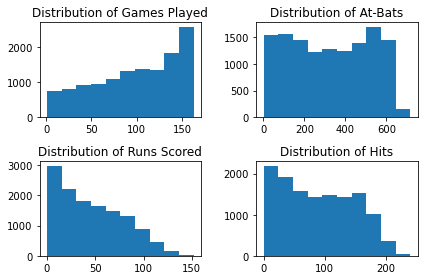

In [581]:
plt.subplot(2,2,1)
plt.hist(pos_players['G'])
plt.title('Distribution of Games Played');

plt.subplot(2,2,2)
plt.hist(pos_players['AB'])
plt.title('Distribution of At-Bats');

plt.subplot(2,2,3)
plt.hist(pos_players['R'])
plt.title('Distribution of Runs Scored');

plt.subplot(2,2,4)
plt.hist(pos_players['H'])
plt.title('Distribution of Hits');

plt.tight_layout()
plt.savefig('pos_players1.png')

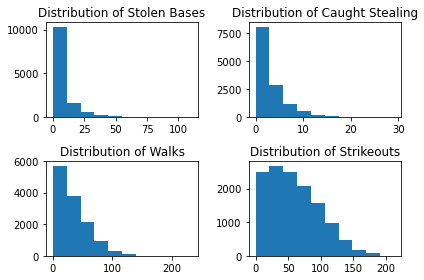

In [582]:
plt.subplot(2,2,1)
plt.hist(pos_players['SB'])
plt.title('Distribution of Stolen Bases');

plt.subplot(2,2,2)
plt.hist(pos_players['CS'])
plt.title('Distribution of Caught Stealing');

plt.subplot(2,2,3)
plt.hist(pos_players['BB'])
plt.title('Distribution of Walks');

plt.subplot(2,2,4)
plt.hist(pos_players['SO'])
plt.title('Distribution of Strikeouts');

plt.tight_layout()
plt.savefig('pos_players2.png')

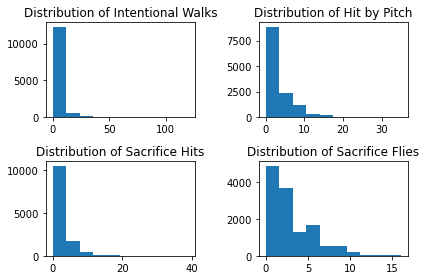

In [583]:
plt.subplot(2,2,1)
plt.hist(pos_players['IBB'])
plt.title('Distribution of Intentional Walks');

plt.subplot(2,2,2)
plt.hist(pos_players['HBP'])
plt.title('Distribution of Hit by Pitch');

plt.subplot(2,2,3)
plt.hist(pos_players['SH'])
plt.title('Distribution of Sacrifice Hits');

plt.subplot(2,2,4)
plt.hist(pos_players['SF'])
plt.title('Distribution of Sacrifice Flies');

plt.tight_layout()
plt.savefig('pos_players3.png')

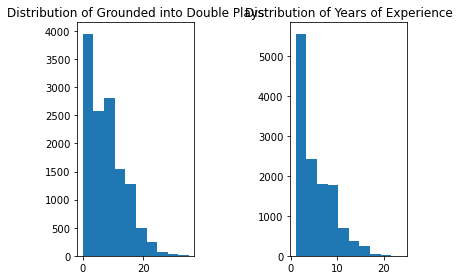

In [584]:
plt.subplot(1,2,1)
plt.hist(pos_players['GIDP'])
plt.title('Distribution of Grounded into Double Plays');

plt.subplot(1,2,2)
plt.hist(pos_players['Years_Exp'])
plt.title('Distribution of Years of Experience');

plt.tight_layout()
plt.savefig('pos_players4.png')

### Distribution of the Target Variable

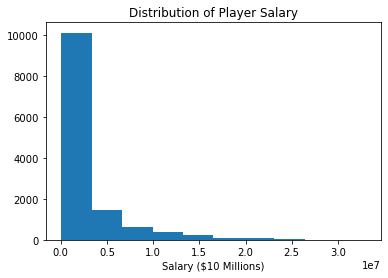

In [585]:
plt.hist(pos_players['salary'])
plt.title('Distribution of Player Salary')
plt.xlabel('Salary ($10 Millions)');
plt.savefig('pos_players_target.png')
# May want to use np.log since the distribution is heavily skewed to the right

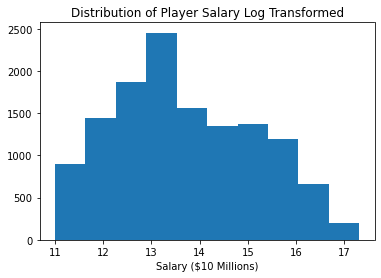

In [586]:
plt.hist(np.log(pos_players['salary']))
plt.title('Distribution of Player Salary Log Transformed')
plt.xlabel('Salary ($10 Millions)');
plt.savefig('pos_players_target_log.png')

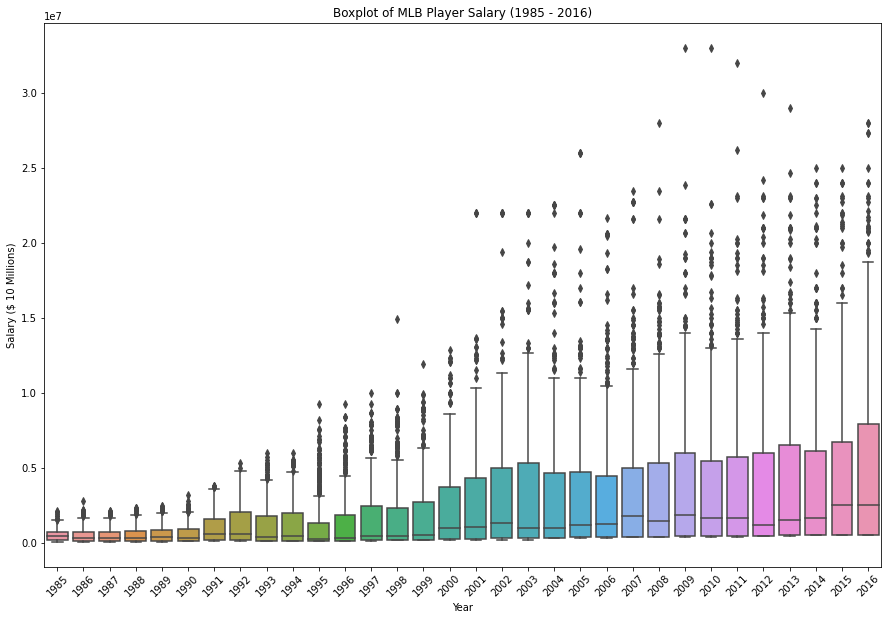

In [587]:
plt.figure(figsize=(15, 10))
sns.boxplot(x='yearID', y='salary', data=pos_players)
plt.title('Boxplot of MLB Player Salary (1985 - 2016)')
plt.xlabel('Year')
plt.ylabel('Salary ($ 10 Millions)')
plt.xticks(rotation=45);
plt.savefig('pos_players_salary_and_seasons.png')

### Adding more standard baseball stats as features

In [393]:
# Adding more MLB standard stats features for model
pos_players['AVG'] = pos_players['H'] / pos_players['AB']
pos_players['OBP'] = (pos_players['H'] + pos_players['BB'] + pos_players['HBP']) / (pos_players['AB'] + pos_players['BB'] + pos_players['HBP'] + pos_players['SF'])
pos_players['SLG'] = (pos_players['H'] + pos_players['2B'] + (pos_players['3B'] * 2) + (pos_players['HR'] * 3))/ pos_players['AB']
pos_players['OPS'] = pos_players['OBP'] + pos_players['SLG']



In [516]:
pos_players.rename(columns={'2B': 'Doubles', '3B': 'Triples'}, inplace=True)
pos_players.columns = pos_players.columns.str.replace(' ', '_')
pos_players.columns = pos_players.columns.str.replace('-', '')

In [578]:
pos_players[pos_players['playerID']== 'troutmi01']

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,Doubles,Triples,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,salary,Years_Exp,allStar,awardID_ALCS_MVP,awardID_AllStar_Game_MVP,awardID_Babe_Ruth_Award,awardID_Gold_Glove,awardID_Hank_Aaron_Award,awardID_Most_Valuable_Player,awardID_NLCS_MVP,awardID_Outstanding_DH_Award,awardID_Rookie_of_the_Year,awardID_Silver_Slugger,awardID_Triple_Crown,awardID_World_Series_MVP,AVG,OBP,SLG,OPS
12562,troutmi01,2013,1,LAA,AL,157,589,109,190,39,9,27,97.0,33.0,7.0,110,136.0,10.0,9.0,0.0,8.0,8.0,510000,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.322581,0.431564,0.556876,0.988440
12563,troutmi01,2014,1,LAA,AL,157,602,115,173,39,9,36,111.0,16.0,2.0,83,184.0,6.0,10.0,0.0,10.0,6.0,1000000,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.287375,0.377305,0.561462,0.938767
12564,troutmi01,2014,1,LAA,AL,157,602,115,173,39,9,36,111.0,16.0,2.0,83,184.0,6.0,10.0,0.0,10.0,6.0,1000000,2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.287375,0.377305,0.561462,0.938767
12565,troutmi01,2014,1,LAA,AL,157,602,115,173,39,9,36,111.0,16.0,2.0,83,184.0,6.0,10.0,0.0,10.0,6.0,1000000,2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.287375,0.377305,0.561462,0.938767
12566,troutmi01,2014,1,LAA,AL,157,602,115,173,39,9,36,111.0,16.0,2.0,83,184.0,6.0,10.0,0.0,10.0,6.0,1000000,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.287375,0.377305,0.561462,0.938767
12567,troutmi01,2015,1,LAA,AL,159,575,104,172,32,6,41,90.0,11.0,7.0,92,158.0,14.0,10.0,0.0,5.0,11.0,6083000,3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.299130,0.401760,0.589565,0.991325
12568,troutmi01,2015,1,LAA,AL,159,575,104,172,32,6,41,90.0,11.0,7.0,92,158.0,14.0,10.0,0.0,5.0,11.0,6083000,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.299130,0.401760,0.589565,0.991325
12569,troutmi01,2016,1,LAA,AL,159,549,123,173,32,5,29,100.0,30.0,7.0,116,137.0,12.0,11.0,0.0,5.0,5.0,16083333,4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.315118,0.440529,0.550091,0.990620
12570,troutmi01,2016,1,LAA,AL,159,549,123,173,32,5,29,100.0,30.0,7.0,116,137.0,12.0,11.0,0.0,5.0,5.0,16083333,4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.315118,0.440529,0.550091,0.990620
12571,troutmi01,2016,1,LAA,AL,159,549,123,173,32,5,29,100.0,30.0,7.0,116,137.0,12.0,11.0,0.0,5.0,5.0,16083333,4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.315118,0.440529,0.550091,0.990620


In [518]:
pos_players.head()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,Doubles,Triples,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,salary,Years_Exp,allStar,awardID_ALCS_MVP,awardID_AllStar_Game_MVP,awardID_Babe_Ruth_Award,awardID_Gold_Glove,awardID_Hank_Aaron_Award,awardID_Most_Valuable_Player,awardID_NLCS_MVP,awardID_Outstanding_DH_Award,awardID_Rookie_of_the_Year,awardID_Silver_Slugger,awardID_Triple_Crown,awardID_World_Series_MVP,AVG,OBP,SLG,OPS
0,rosepe01,1985,1,CIN,NL,119,405,60,107,12,2,2,46.0,8.0,1.0,86,35.0,5.0,4.0,1.0,4.0,10.0,358858,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.264198,0.394790,0.318519,0.713308
1,rosepe01,1986,1,CIN,NL,72,237,15,52,8,2,0,25.0,3.0,0.0,30,31.0,0.0,4.0,0.0,1.0,2.0,1000000,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.219409,0.316176,0.270042,0.586219
2,staubru01,1985,1,NYN,NL,54,45,2,12,3,0,1,8.0,0.0,0.0,10,4.0,3.0,0.0,0.0,0.0,1.0,300000,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.266667,0.400000,0.400000,0.800000
3,perezto01,1985,1,CIN,NL,72,183,25,60,8,0,6,33.0,0.0,2.0,22,22.0,1.0,0.0,0.0,2.0,2.0,225000,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.327869,0.396135,0.469945,0.866081
4,perezto01,1986,1,CIN,NL,77,200,14,51,12,1,2,29.0,0.0,0.0,25,25.0,2.0,0.0,0.0,3.0,6.0,275000,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.255000,0.333333,0.355000,0.688333


In [519]:
pos_players.describe()

,yearID,stint,G,AB,R,H,Doubles,Triples,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,salary,Years_Exp,allStar,awardID_ALCS_MVP,awardID_AllStar_Game_MVP,awardID_Babe_Ruth_Award,awardID_Gold_Glove,awardID_Hank_Aaron_Award,awardID_Most_Valuable_Player,awardID_NLCS_MVP,awardID_Outstanding_DH_Award,awardID_Rookie_of_the_Year,awardID_Silver_Slugger,awardID_Triple_Crown,awardID_World_Series_MVP,AVG,OBP,SLG,OPS
count,12989.000000,12989.000000,12989.000000,12989.000000,12989.000000,12989.000000,12989.000000,12989.000000,12989.000000,12989.000000,12989.000000,12989.000000,12989.000000,12989.000000,12989.000000,12989.000000,12989.000000,12989.000000,12989.000000,1.298900e+04,12989.000000,12989.000000,12989.000000,12989.000000,12989.000000,12989.000000,12989.000000,12989.000000,12989.000000,12989.000000,12989.000000,12989.000000,12989.000000,12989.000000,12989.000000,12989.000000,12989.000000,12989.000000
mean,2000.211564,1.006082,99.020325,326.403187,46.249211,88.695435,17.193625,1.877897,10.813689,44.678574,6.698745,2.754793,33.349296,58.597583,3.145046,3.052968,1.871738,2.876203,7.512588,2.458799e+06,5.157826,0.141273,0.001309,0.001925,0.000924,0.035492,0.002772,0.004465,0.001155,0.000077,0.002387,0.039033,0.000077,0.001155,0.254943,0.323152,0.399095,0.722248
std,8.825441,0.083483,46.369475,193.434174,33.527800,58.437305,12.351134,2.355630,11.390043,34.635147,10.360057,3.387440,26.905712,38.534580,5.398208,3.614291,2.890709,2.655235,5.791849,3.956216e+06,3.831334,0.348317,0.036155,0.043831,0.030382,0.185026,0.052575,0.066676,0.033964,0.008774,0.048797,0.193681,0.008774,0.033964,0.055813,0.063332,0.111427,0.165258
min,1985.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000e+04,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1993.000000,1.000000,62.000000,152.000000,17.000000,36.000000,7.000000,0.000000,2.000000,16.000000,0.000000,0.000000,12.000000,27.000000,0.000000,1.000000,0.000000,1.000000,3.000000,3.009000e+05,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.232092,0.295316,0.338462,0.641060
50%,2000.000000,1.000000,106.000000,328.000000,41.000000,85.000000,16.000000,1.000000,7.000000,38.000000,3.000000,2.000000,27.000000,53.000000,1.000000,2.000000,1.000000,2.000000,6.000000,7.000000e+05,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.260479,0.327014,0.400000,0.727577
75%,2008.000000,1.000000,141.000000,505.000000,71.000000,139.000000,26.000000,3.000000,16.000000,67.000000,8.000000,4.000000,49.000000,84.000000,4.000000,4.000000,3.000000,4.000000,11.000000,2.850000e+06,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.286624,0.358491,0.464088,0.814311
max,2016.000000,3.000000,163.000000,716.000000,152.000000,240.000000,59.000000,23.000000,73.000000,165.000000,110.000000,29.000000,232.000000,212.000000,120.000000,35.000000,39.000000,16.000000,35.000000,3.300000e+07,24.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.800000,2.657143


### Jointplots of the new baseball stats compared with salary

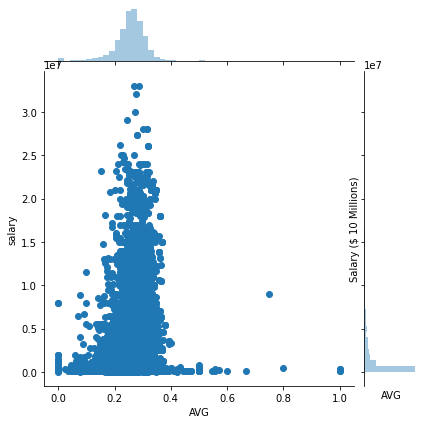

In [588]:
sns.jointplot(
    pos_players['AVG'],
    pos_players['salary']
);
plt.xlabel('AVG')
plt.ylabel('Salary ($ 10 Millions)');
plt.savefig('pos_players_avg_salary.png')

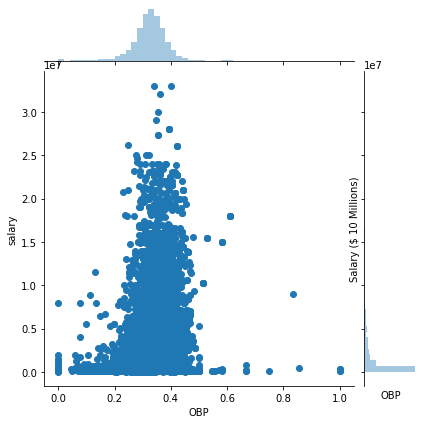

In [589]:
sns.jointplot(
    pos_players['OBP'],
    pos_players['salary']
);
plt.xlabel('OBP')
plt.ylabel('Salary ($ 10 Millions)');
plt.savefig('pos_players_obp_salary.png')

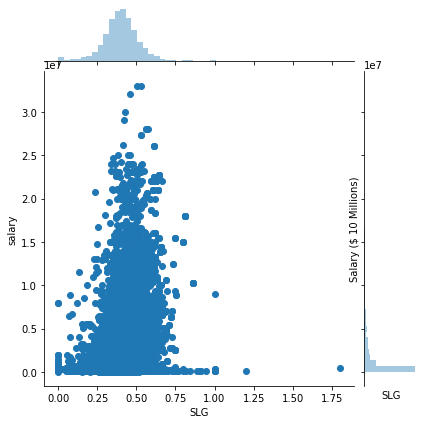

In [590]:
sns.jointplot(
    pos_players['SLG'],
    pos_players['salary']
);
plt.xlabel('SLG')
plt.ylabel('Salary ($ 10 Millions)');
plt.savefig('pos_players_slg_salary.png')

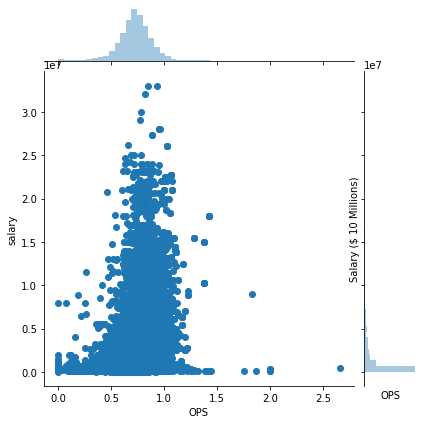

In [591]:
sns.jointplot(
    pos_players['OPS'],
    pos_players['salary']
);
plt.xlabel('OPS')
plt.ylabel('Salary ($ 10 Millions)');
plt.savefig('pos_players_ops_salary.png')

### Boxplot of Salary vs All Star Status

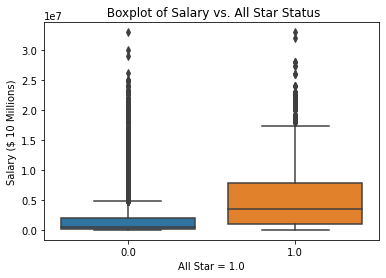

In [592]:
sns.boxplot(x='allStar', y='salary', data=pos_players)
plt.title(' Boxplot of Salary vs. All Star Status')
plt.xlabel('All Star = 1.0')
plt.ylabel('Salary ($ 10 Millions)');
plt.savefig('pos_players_allstar.png')

### Boxplots of Salary vs. Award Winners

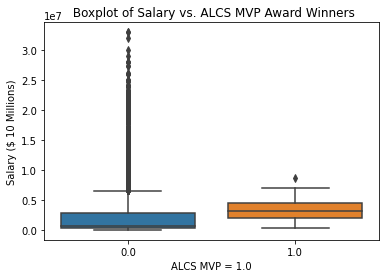

In [593]:
sns.boxplot(x='awardID_ALCS_MVP', y='salary', data=pos_players)
plt.title(' Boxplot of Salary vs. ALCS MVP Award Winners')
plt.xlabel('ALCS MVP = 1.0')
plt.ylabel('Salary ($ 10 Millions)');
plt.savefig('pos_players_alcs_mvp.png')

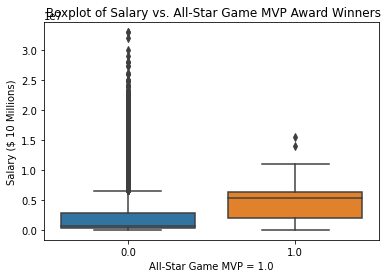

In [594]:
sns.boxplot(x='awardID_AllStar_Game_MVP', y='salary', data=pos_players)
plt.title(' Boxplot of Salary vs. All-Star Game MVP Award Winners')
plt.xlabel('All-Star Game MVP = 1.0')
plt.ylabel('Salary ($ 10 Millions)');
plt.savefig('pos_players_allstar_mvp.png')

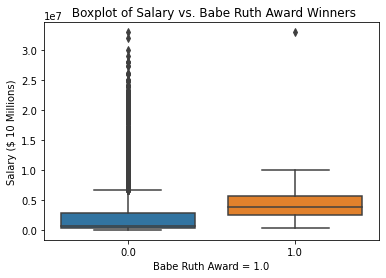

In [595]:
sns.boxplot(x='awardID_Babe_Ruth_Award', y='salary', data=pos_players)
plt.title(' Boxplot of Salary vs. Babe Ruth Award Winners')
plt.xlabel('Babe Ruth Award = 1.0')
plt.ylabel('Salary ($ 10 Millions)');
plt.savefig('pos_players_babe_ruth_award.png')

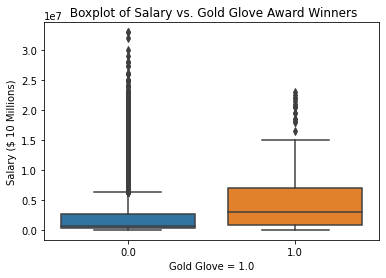

In [596]:
sns.boxplot(x='awardID_Gold_Glove', y='salary', data=pos_players)
plt.title(' Boxplot of Salary vs. Gold Glove Award Winners')
plt.xlabel('Gold Glove = 1.0')
plt.ylabel('Salary ($ 10 Millions)');
plt.savefig('pos_players_goldglove.png')

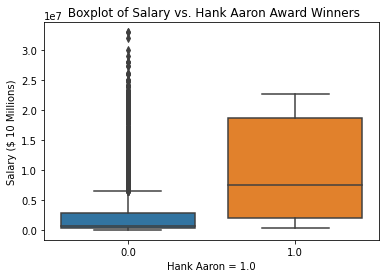

In [597]:
sns.boxplot(x='awardID_Hank_Aaron_Award', y='salary', data=pos_players)
plt.title(' Boxplot of Salary vs. Hank Aaron Award Winners')
plt.xlabel('Hank Aaron = 1.0')
plt.ylabel('Salary ($ 10 Millions)');
plt.savefig('pos_players_hank_aaron_award.png')

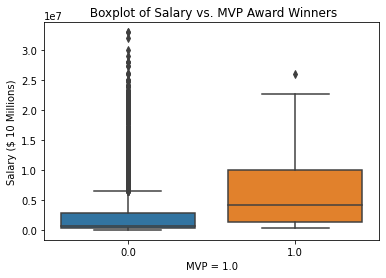

In [598]:
sns.boxplot(x='awardID_Most_Valuable_Player', y='salary', data=pos_players)
plt.title(' Boxplot of Salary vs. MVP Award Winners')
plt.xlabel('MVP = 1.0')
plt.ylabel('Salary ($ 10 Millions)');
plt.savefig('pos_players_mvp.png')

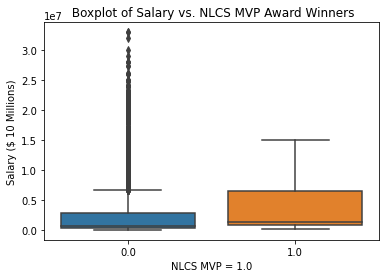

In [599]:
sns.boxplot(x='awardID_NLCS_MVP', y='salary', data=pos_players)
plt.title(' Boxplot of Salary vs. NLCS MVP Award Winners')
plt.xlabel('NLCS MVP = 1.0')
plt.ylabel('Salary ($ 10 Millions)');
plt.savefig('pos_players_nlcs_mvp.png')

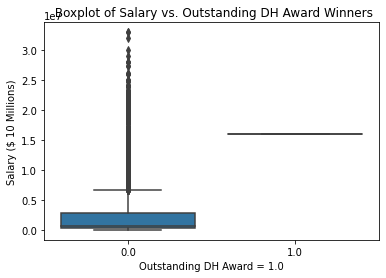

In [600]:
sns.boxplot(x='awardID_Outstanding_DH_Award', y='salary', data=pos_players)
plt.title(' Boxplot of Salary vs. Outstanding DH Award Winners')
plt.xlabel('Outstanding DH Award = 1.0')
plt.ylabel('Salary ($ 10 Millions)');
plt.savefig('pos_players_DH.png')

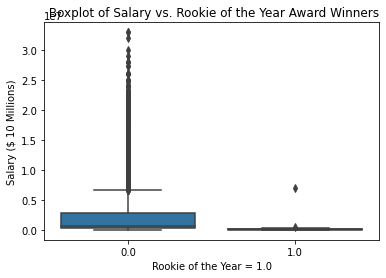

In [601]:
sns.boxplot(x='awardID_Rookie_of_the_Year', y='salary', data=pos_players)
plt.title(' Boxplot of Salary vs. Rookie of the Year Award Winners')
plt.xlabel('Rookie of the Year = 1.0')
plt.ylabel('Salary ($ 10 Millions)');
plt.savefig('pos_players_roy.png')

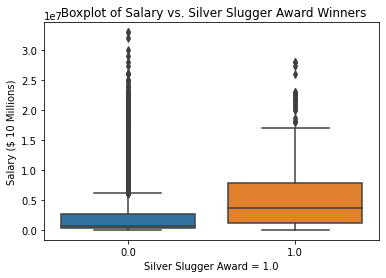

In [602]:
sns.boxplot(x='awardID_Silver_Slugger', y='salary', data=pos_players)
plt.title(' Boxplot of Salary vs. Silver Slugger Award Winners')
plt.xlabel('Silver Slugger Award = 1.0')
plt.ylabel('Salary ($ 10 Millions)');
plt.savefig('pos_players_silver_slugger.png')

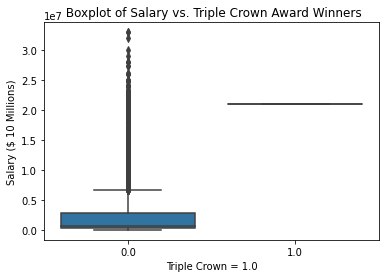

In [603]:
sns.boxplot(x='awardID_Triple_Crown', y='salary', data=pos_players)
plt.title(' Boxplot of Salary vs. Triple Crown Award Winners')
plt.xlabel('Triple Crown = 1.0')
plt.ylabel('Salary ($ 10 Millions)');
plt.savefig('pos_players_triple_crown.png')

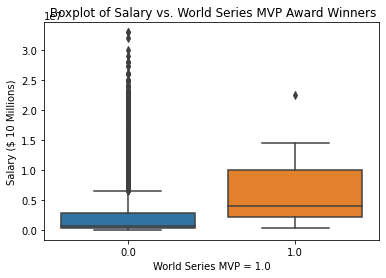

In [604]:
sns.boxplot(x='awardID_World_Series_MVP', y='salary', data=pos_players)
plt.title(' Boxplot of Salary vs. World Series MVP Award Winners')
plt.xlabel('World Series MVP = 1.0')
plt.ylabel('Salary ($ 10 Millions)');
plt.savefig('pos_players_ws_mvp.png')

### Boxplot of Salary vs Years of Experience

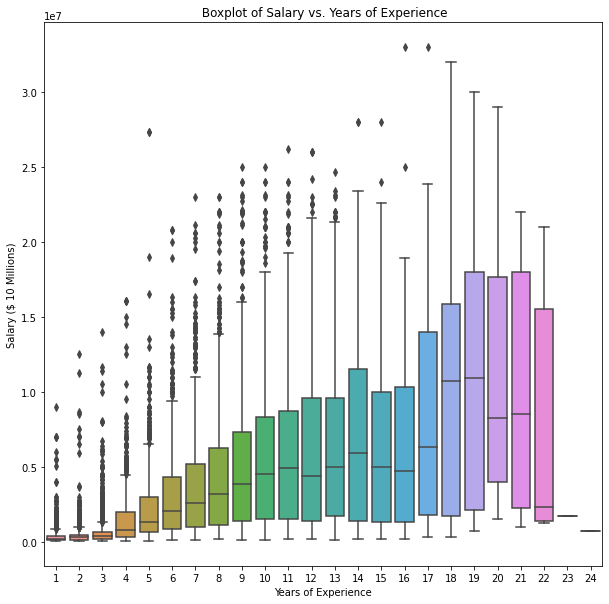

In [605]:
plt.figure(figsize=(10, 10))
sns.boxplot(x='Years_Exp', y='salary', data=pos_players)
plt.title(' Boxplot of Salary vs. Years of Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary ($ 10 Millions)');
plt.savefig('pos_players_exp_salary.png')

### Heatmap Correlation

In [540]:
pos_players.corr()

,yearID,stint,G,AB,R,H,Doubles,Triples,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,salary,Years_Exp,allStar,awardID_ALCS_MVP,awardID_AllStar_Game_MVP,awardID_Babe_Ruth_Award,awardID_Gold_Glove,awardID_Hank_Aaron_Award,awardID_Most_Valuable_Player,awardID_NLCS_MVP,awardID_Outstanding_DH_Award,awardID_Rookie_of_the_Year,awardID_Silver_Slugger,awardID_Triple_Crown,awardID_World_Series_MVP,AVG,OBP,SLG,OPS
yearID,1.000000,-0.037800,0.032481,0.054246,0.036163,0.044323,0.098467,-0.041881,0.073013,0.043031,-0.072293,-0.135898,0.013409,0.188846,-0.038502,0.156759,-0.101155,-0.007592,0.075632,0.369114,0.248993,0.002975,0.002752,0.000540,-0.002165,0.003276,0.043539,0.003628,0.006891,0.015698,-0.017621,0.006339,0.011721,0.012285,-0.014474,-0.016575,0.041365,0.021539
stint,-0.037800,1.000000,-0.099082,-0.084419,-0.073052,-0.079305,-0.075216,-0.043988,-0.053788,-0.069143,-0.032511,-0.037471,-0.063811,-0.072691,-0.035444,-0.048275,-0.027715,-0.050441,-0.066480,-0.035012,0.004942,-0.024255,-0.002637,-0.003199,-0.002215,-0.013976,-0.003841,-0.004879,-0.002477,-0.000639,-0.003564,-0.009922,-0.000639,-0.002477,-0.041695,-0.039782,-0.036981,-0.040180
G,0.032481,-0.099082,1.000000,0.954514,0.875142,0.923759,0.854283,0.499974,0.665760,0.828656,0.438978,0.493473,0.756190,0.787856,0.435670,0.489617,0.230955,0.658633,0.721903,0.288107,0.125670,0.397300,0.027769,0.041235,0.025509,0.190428,0.063647,0.074879,0.024576,0.009837,0.047243,0.213536,0.011729,0.027851,0.494720,0.479638,0.532797,0.543055
AB,0.054246,-0.084419,0.954514,1.000000,0.928907,0.980672,0.906314,0.532734,0.705418,0.873744,0.482216,0.519835,0.761354,0.802379,0.431871,0.508540,0.199896,0.690030,0.761897,0.344710,0.141960,0.456032,0.034604,0.049646,0.029021,0.219792,0.065280,0.080666,0.027258,0.009554,0.052217,0.242520,0.013409,0.031231,0.507736,0.468464,0.548433,0.549315
R,0.036163,-0.073052,0.875142,0.928907,1.000000,0.950123,0.889024,0.534952,0.799411,0.899656,0.539000,0.524524,0.843701,0.764700,0.509872,0.532307,0.122966,0.664437,0.667517,0.380912,0.161919,0.556632,0.034347,0.051752,0.031520,0.228073,0.105443,0.130311,0.025846,0.008572,0.054510,0.310809,0.016423,0.028618,0.543352,0.561540,0.645978,0.650755
H,0.044323,-0.079305,0.923759,0.980672,0.950123,1.000000,0.926029,0.536891,0.724101,0.893370,0.491965,0.516102,0.765976,0.747091,0.471388,0.502977,0.163647,0.692699,0.758144,0.357002,0.151496,0.522751,0.038270,0.056892,0.031816,0.228612,0.081070,0.104882,0.030901,0.012059,0.054986,0.284484,0.017464,0.034508,0.584211,0.533475,0.607541,0.614083
Doubles,0.098467,-0.075216,0.854283,0.906314,0.889024,0.926029,1.000000,0.437581,0.706087,0.864209,0.381852,0.404656,0.729528,0.718092,0.456617,0.496897,0.080897,0.676123,0.714686,0.352468,0.152067,0.490261,0.032019,0.052219,0.020041,0.205374,0.081224,0.095715,0.032137,0.021887,0.054549,0.273155,0.016203,0.028833,0.541365,0.506455,0.621160,0.612911
Triples,-0.041881,-0.043988,0.499974,0.532734,0.534952,0.536891,0.437581,1.000000,0.212919,0.354357,0.576600,0.554882,0.348052,0.386172,0.141677,0.218975,0.270616,0.295847,0.235331,0.023360,-0.057198,0.215081,0.027189,0.032105,0.002652,0.144199,0.004598,0.039747,0.016198,-0.003270,0.046744,0.099045,-0.006995,-0.003049,0.300296,0.243041,0.263892,0.271072
HR,0.073013,-0.053788,0.665760,0.705418,0.799411,0.724101,0.706087,0.212919,1.000000,0.912082,0.175429,0.187993,0.739081,0.733582,0.591321,0.459538,-0.201030,0.580903,0.568982,0.424018,0.190757,0.560103,0.021906,0.049299,0.025639,0.158664,0.148595,0.163915,0.025235,0.020945,0.036679,0.348439,0.025567,0.027226,0.405030,0.463851,0.732305,0.671524
RBI,0.043031,-0.069143,0.828656,0.873744,0.899656,0.893370,0.864209,0.354357,0.912082,1.000000,0.286781,0.312412,0.790416,0.767675,0.572119,0.492163,-0.060098,0.734979,0.721686,0.415511,0.192846,0.572087,0.032554,0.053966,0.036574,0.201006,0.120065,0.138684,0.031994,0.020856,0.043186,0.338040,0.023897,0.036052,0.512106,0.519811,0.706050,0.675267


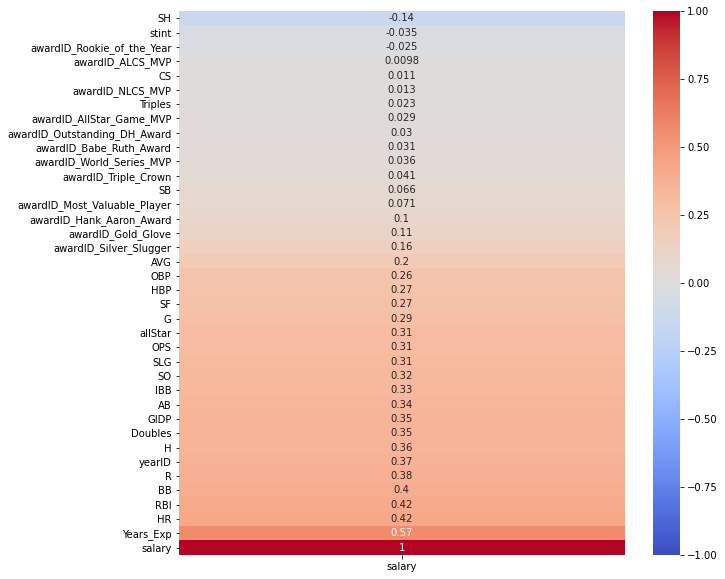

In [606]:
plt.figure(figsize=(10,10))
sns.heatmap(pos_players.corr()[['salary']].sort_values('salary'),
           annot=True,
           vmin=-1,
           vmax=1,
           cmap='coolwarm');
plt.savefig('pos_players_heatmap.png')

## Modeling - Linear Regression

In [542]:
X = pos_players.drop(columns=['salary', 'playerID', 'stint', 'teamID', 'lgID'])
y = pos_players['salary']
print(X.shape)
print(y.shape)

(12989, 36)
(12989,)


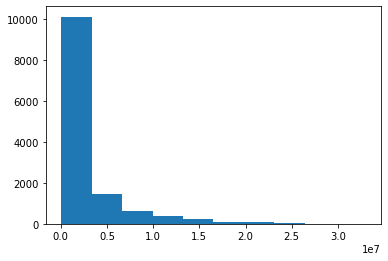

In [543]:
# Heavily right skewed - may want to log transform our target
plt.hist(y);

## Train Test Split

In [544]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   random_state=23)

In [545]:
y_train_log = np.log(y_train)
y_test_log = np.log(y_test)

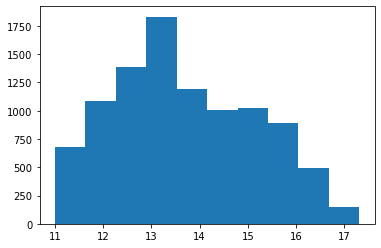

In [546]:
plt.hist(y_train_log);

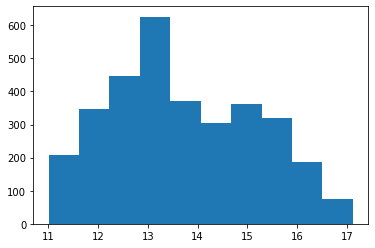

In [547]:
plt.hist(y_test_log);

In [548]:
# Instantiate Linear Regression Model
lr = LinearRegression()

In [549]:
# Fit the model on training data
lr.fit(X_train, y_train_log)

LinearRegression()

In [550]:
# R2 scores on training and testing data
lr.score(X_train, y_train_log), lr.score(X_test, y_test_log)

(0.7118204802024624, 0.716957997726102)

In [551]:
pred_lr = lr.predict(X_test)

In [552]:
np.exp(pred_lr)

array([ 411298.07161804, 3282461.2882345 , 8970726.20156669, ...,
        198023.34511326, 2241754.79988888, 1456666.01898216])

In [553]:
# RMSE
np.sqrt(mean_squared_error(y_test, np.exp(pred_lr)))

5123588.592529302

In [554]:
resids = y_test_log - pred_lr

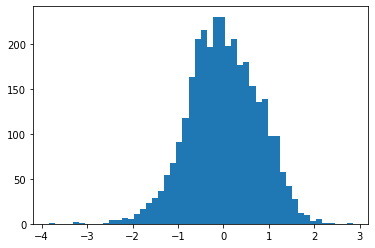

In [555]:
plt.hist(resids, bins=50);

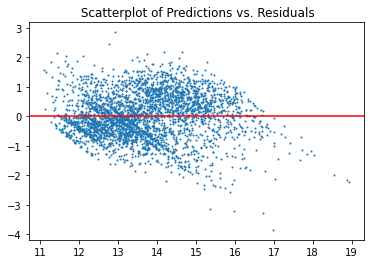

In [607]:
# Plot a scatter of predctions vs residuals.
plt.scatter(pred_lr, resids, s=1)
plt.axhline(0, color="red");
plt.title(' Scatterplot of Predictions vs. Residuals');
plt.savefig('pos_players_scatter.png')

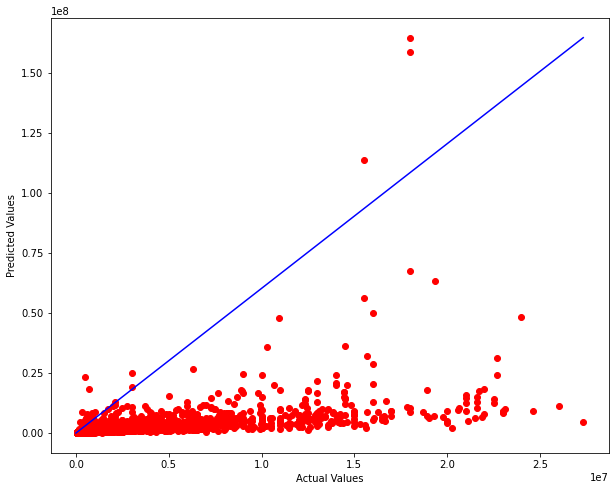

In [557]:
# Plot predicted target values vs actual on scatterplot
plt.figure(figsize=(10,8))
plt.scatter(np.exp(y_test_log), np.exp(pred_lr), color = 'red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([0,np.max(np.exp(y_test_log))],[0,np.max(np.exp(pred_lr))], color = 'blue');

In [558]:
np.exp(lr.coef_)

array([1.05298714, 0.98878535, 1.00731084, 1.00193205, 0.98996661,
       0.99300181, 0.97715115, 0.99659014, 1.00421976, 1.00350673,
       0.99212188, 1.00610222, 0.99614594, 1.00800434, 1.00325682,
       0.96942007, 1.01034868, 1.00717426, 1.20471365, 1.28311251,
       1.54592065, 1.42187584, 1.43957612, 1.20560735, 0.77754054,
       0.88787572, 1.3971559 , 0.2498142 , 0.33155872, 1.03890233,
       1.        , 1.18513562, 0.54523216, 1.96576542, 0.84034731,
       1.65192569])

In [575]:
coef_df = pd.DataFrame({
    'Features': X.columns,
    'Coef Value': np.exp(lr.coef_)
})

In [577]:
coef_df['Features'].values

array(['yearID', 'G', 'AB', 'R', 'H', 'Doubles', 'Triples', 'HR', 'RBI',
       'SB', 'CS', 'BB', 'SO', 'IBB', 'HBP', 'SH', 'SF', 'GIDP',
       'Years_Exp', 'allStar', 'awardID_ALCS_MVP',
       'awardID_AllStar_Game_MVP', 'awardID_Babe_Ruth_Award',
       'awardID_Gold_Glove', 'awardID_Hank_Aaron_Award',
       'awardID_Most_Valuable_Player', 'awardID_NLCS_MVP',
       'awardID_Outstanding_DH_Award', 'awardID_Rookie_of_the_Year',
       'awardID_Silver_Slugger', 'awardID_Triple_Crown',
       'awardID_World_Series_MVP', 'AVG', 'OBP', 'SLG', 'OPS'],
      dtype=object)

### AdaBoost Model

In [561]:
ada = AdaBoostRegressor(base_estimator = LinearRegression())
ada_params = {
    'n_estimators': [50, 100],
    'learning_rate': [.9, 1.0],
    'random_state': [None, 42]
}
gs = GridSearchCV(ada, param_grid=ada_params, cv=5)
gs.fit(X_train, y_train_log)
print(gs.best_score_)
gs.best_params_

0.6985490423557916


{'learning_rate': 0.9, 'n_estimators': 50, 'random_state': 42}

In [562]:
gs.score(X_test, y_test_log)

0.7038312748977333

### Gradient Boosting Model

In [563]:
gboost = GradientBoostingRegressor()
gboost_params = {
    'max_depth': [2,3,4],
    'n_estimators': [100, 125, 150],
    'learning_rate': [.08, .1, .12]
}
gb_gs = GridSearchCV(gboost, param_grid=gboost_params, cv=5)
gb_gs.fit(X_train, y_train_log)
print(gb_gs.best_score_)
gb_gs.best_params_

0.8341894246589607


{'learning_rate': 0.12, 'max_depth': 4, 'n_estimators': 150}

In [564]:
gb_gs.score(X_test, y_test_log)

0.843346529283713

### Feature Engineering - Polynomial Features

In [565]:
# Polynomial Features create interaction terms
poly = PolynomialFeatures(degree=2, include_bias=False)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

print(X_train_poly.shape)
X_test_poly.shape

(9741, 702)


(3248, 702)

### Feature Engineering - Standard Scaler

In [566]:
ss = StandardScaler()

X_train_poly_sc = ss.fit_transform(X_train_poly)
X_test_poly_sc = ss.transform(X_test_poly)

### Lasso Regression Model

In [567]:
lcv = LassoCV()
lcv.fit(X_train_poly_sc, y_train_log)
lcv.score(X_train_poly_sc, y_train_log), lcv.score(X_test_poly_sc, y_test_log)

/Users/brandonhoskins/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.2833197153013316, tolerance: 1.633040893775604
  model = cd_fast.enet_coordinate_descent_gram(
/Users/brandonhoskins/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.0515282099327123, tolerance: 1.6336759234806788
  model = cd_fast.enet_coordinate_descent_gram(
/Users/brandonhoskins/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.368669391664298, tolerance: 1.6302924796600218
  model = cd_fast.enet_coordinate_descent_gram(
/Users/brandonhoskins/opt/a

(0.7902419262492212, 0.7841017287218599)

In [568]:
# From Regularization Review lesson
coef_df = pd.DataFrame({
    'var': poly.get_feature_names(X.columns),
    'coef val': lcv.coef_
}).set_index('var').sort_values('coef val', ascending=False)

In [569]:
coef_df[coef_df['coef val'] != 0]

,coef val
var,
Years_Exp,1.153048
AB Years_Exp,0.810630
AB,0.745461
SO Years_Exp,0.404009
BB,0.288675
yearID,0.254694
AB RBI,0.248423
G^2,0.232265
yearID^2,0.226351


### Pickling Linear Regression Model to Use in Flask

In [570]:
with open('position_players.p','wb') as pickle_out:
    pickle.dump(lr, pickle_out)

In [571]:
with open('position_players.p', 'rb') as pickle_in:
    lr = pickle.load(pickle_in)

In [572]:
lr.score(X_train, y_train_log), lr.score(X_test, y_test_log)

(0.7118204802024624, 0.716957997726102)

### Ridge Regression Model

In [573]:
rcv = RidgeCV()
rcv.fit(X_train_poly_sc, y_train_log)
rcv.score(X_train_poly_sc, y_train_log), rcv.score(X_test_poly_sc, y_test_log)

(0.8042645497318257, 0.7835591130953654)